In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

with open("../results/tone_1.kHz_2024-05-15T11:53:41.9.pic", "rb") as f:
    orig_result = pickle.load(f)

angle_to_rate = orig_result["angle_to_rate"]
orig_angles = angle_to_rate.keys()
angles = [-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90]
result = {}
for bad,good in zip(orig_angles,angles):
    result[good] = angle_to_rate[bad]

arr_n_spikes_r_lso = [x["n_spikes_r_lso"] for angle, x in result.items()]
arr_n_spikes_l_lso = [x["n_spikes_l_lso"] for angle, x in result.items()]
arr_n_spikes_r_mso = [x["n_spikes_r_mso"] for angle, x in result.items()]
arr_n_spikes_l_mso = [x["n_spikes_l_mso"] for angle, x in result.items()]

In [10]:
# interp_r_lso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_r_lso)
# interp_l_lso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_l_lso)
# interp_r_mso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_r_mso)
# interp_l_mso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_l_mso)

In [11]:
orig_result["conf"]

{'constants': {'SYN_WEIGHTS': {'ANFs2SBCs': 2.0,
   'ANFs2GBCs': 1.0,
   'SBCs2MSO': 1,
   'SBCs2MSO_inh': 0,
   'SBCs2inhMSO_inh': -30,
   'SBCs2LSO': 16.0,
   'MNTBCs2MSO': -30,
   'MNTBCs2inhMSO': -30,
   'GBCs2MNTBCs': 16.0,
   'MNTBCs2LSO': -2.0},
  'POP_CONN': {'ANFs2SBCs': 4, 'ANFs2GBCs': 20},
  'n_ANFs': 35000,
  'SBCs2MSOs': 5,
  'SBCs2LSOs': 5,
  'n_SBCs': 8750,
  'n_GBCs': 1750,
  'n_MSOs': 1750,
  'n_inhMSOs': 1750,
  'V_m': -70,
  'V_reset': -70,
  'C_m_sbc': 3,
  'C_m_gcb': 2,
  'cap_nuclei': 1,
  'C_mso': 1,
  'delays_mso': [1, 1.3, 1, 0.45, 0.44]},
 'paths': {'DATA_DIR': '../data/',
  'IRCAM_DIR': '../data/IRCAM/',
  'IHF_SPIKES_DIR': '../data/IHF_SPIKES/',
  'RESULTS_DIR': '../results/'},
 'model_desc': {'name': 'Simple model v1.0',
  'networkdef': '    def create_network(self, anfs_per_ear):\n        r_ANFs = anfs_per_ear["L"]\n        l_ANFs = anfs_per_ear["R"]\n\n        r_SBCs = nest.Create(\n            "iaf_cond_alpha", C.n_SBCs, params={"C_m": C.C_m_sbc, "V_rese

ValueError: x and y must be the same size

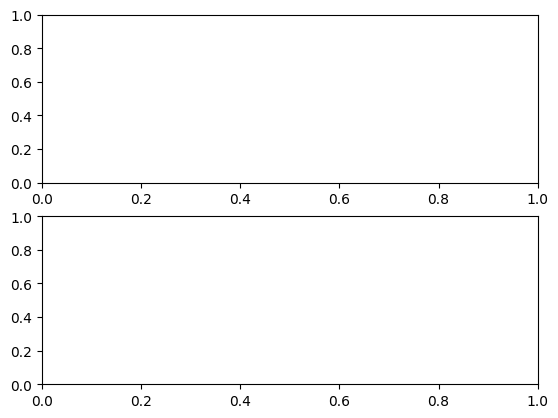

In [9]:
fig, [lso, mso] = plt.subplots(2, 1)

lso.scatter(angles, arr_n_spikes_r_lso, label="right lso")
# lso.plot(np.arange(200), interp_r_lso(np.arange(200)), 'c')
lso.scatter(angles, arr_n_spikes_l_lso, label="left lso")
# lso.plot(np.arange(200), interp_l_lso(np.arange(200)), 'orange')
lso.set_ylabel("total spikes")
_ = lso.legend()

mso.scatter(angles, arr_n_spikes_r_mso, label="right mso")
# mso.plot(np.arange(200), interp_r_mso(np.arange(200)), 'c')
mso.scatter(angles, arr_n_spikes_l_mso, label="left mso")
# mso.plot(np.arange(200), interp_l_mso(np.arange(200)), 'orange')
mso.set_xlabel("sound position")
mso.set_ylabel("total spikes")
_ = mso.legend()
